# Research Question & Data Collection
With our project we want to compare the environmental impacts of the fashion industry across countries, particularly paying attention to the differences observed between developed and developing countries. To do this we found data from the non-profit Climate Watch that lists greenhouse gas emissions by country, by year, over a number of industries. Using this data we will answer the following question: **How does the impact of the fast fashion industry vary across countries based on the development of a country?**

The data we collected is from five CSV files beings: agriculture, energy, waste, industrial-processes, and bunker-fuels." These file contain data that shows MtCO2 emissions for almost 200 countires for years between 1991 and 2018. Some files contain data before this windown, but to keep our obesrvations consistent we will not take these values into account. 

In [1]:
## load libraries

## our old friends...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ...and some new ones
import seaborn as sns


# Data Cleaning, Data Description, Beginnings of EDA

Below we load the CSV files to python variables. The CSV files contained values that made jupyter interperut that columns values as strings. 
Using the na_value paramter we converted these cells into na values so that the columns could be processed at floats without their summary statistic values being affected by these unusable cells.

In [2]:
#Load CSVs
agriculture=pd.read_csv('agriculture.csv', na_values={'false','False','FALSE'})
energy=pd.read_csv('energy.csv',  na_values={'false','False','FALSE'})
waste=pd.read_csv('waste.csv',   na_values={'false','False','FALSE'})
industrial=pd.read_csv('industrial-processes.csv',  na_values={'false','False','FALSE'})
bunker_fuels=pd.read_csv('bunker-fuels.csv',  na_values={'false','False','FALSE'})

#### Agriculture
We have chosen to look at agriculture emissions since cotton produciton is both a major source of these emissions as well as a material used in lots of fashion production. We use the .head() and .describe() to give us a brief overview of our data, and .dtype to let us know that the CSV file was read properly. 

In [3]:
agriculture.head()

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,China,MtCO2e,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,3963.61,...,9046.19,9872.37,10364.83,10690.04,11144.76,11155.76,11149.68,11207.66,11408.26,11705.81
1,United States,MtCO2e,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,6258.47,...,5793.66,6041.59,5796.78,5550.87,5690.79,5711.15,5586.69,5676.92,5613.64,5794.35
2,India,MtCO2e,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,1348.09,...,2467.78,2576.93,2610.32,2758.53,2816.49,2988.34,3002.17,3073.24,3202.82,3346.63
3,Russia,MtCO2e,2885.12,2788.70,2551.94,2294.62,2011.47,1930.88,1889.18,1755.59,...,1575.54,1690.93,1864.86,1886.41,1844.48,1841.26,1791.21,1918.26,1939.26,1992.08
4,Indonesia,MtCO2e,1257.10,1274.43,1295.01,1311.27,1327.87,1360.88,1179.00,2142.82,...,1483.61,1125.25,1675.72,1695.27,1636.17,2016.28,2070.24,1453.23,1466.05,1703.86


In [4]:
agriculture.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,189.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,167.973545,165.380052,164.705233,165.176839,166.121917,169.715596,171.455078,178.099275,175.498238,175.324611,...,215.911192,224.386995,224.990777,228.038964,231.182383,234.054508,234.229067,237.393886,240.088497,244.874715
std,536.627096,531.798918,533.953728,540.662567,545.922424,562.294116,571.145534,596.103724,592.154060,590.632253,...,819.318266,876.714466,897.017549,911.752696,943.446714,950.442680,946.429169,949.438476,962.189593,989.439015
min,-5.460000,-5.410000,-5.420000,-5.450000,-5.420000,-5.320000,-5.290000,-5.200000,-5.190000,-5.130000,...,-5.140000,-4.990000,-165.520000,-168.240000,-177.810000,-178.710000,-177.030000,0.010000,0.010000,0.010000
25%,8.250000,7.360000,7.090000,7.440000,6.810000,7.110000,7.250000,7.170000,7.590000,8.090000,...,8.020000,8.010000,8.790000,8.420000,8.600000,8.760000,8.830000,9.500000,9.640000,9.940000
50%,31.560000,29.240000,26.790000,26.920000,26.300000,27.900000,27.830000,28.370000,29.560000,29.090000,...,36.970000,36.890000,33.860000,34.980000,36.810000,37.850000,37.100000,42.570000,42.140000,43.740000
75%,94.440000,94.540000,85.470000,93.880000,99.450000,103.660000,102.160000,103.860000,105.000000,107.800000,...,118.350000,122.670000,115.160000,117.930000,114.270000,116.730000,118.650000,122.840000,122.840000,123.330000
max,5543.470000,5501.920000,5583.800000,5691.260000,5782.200000,5843.900000,6010.620000,6258.470000,6293.800000,6291.250000,...,9046.190000,9872.370000,10364.830000,10690.040000,11144.760000,11155.760000,11149.680000,11207.660000,11408.260000,11705.810000


In [5]:
agriculture.dtypes

Country/Region     object
unit               object
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
dtype: object

#### Bunker Fuel
We have chosen to look at bunker fuel emissions since this fuel source is mostly used for large shipping containers which could be indictive of how fashion products are shipped. We use the .head() and .describe() to give us a brief overview of our data, and .dtype to let us know that the CSV file was read properly. 

In [6]:
bunker_fuels.head()

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Singapore,MtCO2e,39.91,37.17,45.06,42.28,43.91,43.54,50.71,58.52,...,128.61,144.46,152.94,153.48,154.39,153.70,162.75,174.85,182.59,181.27
1,United States,MtCO2e,130.82,137.09,143.99,132.47,130.17,137.89,134.62,126.73,...,141.15,148.81,145.64,119.40,118.34,118.97,124.49,136.85,148.23,144.85
2,United Arab Emirates,MtCO2e,29.09,39.97,39.84,40.66,43.80,43.70,43.06,43.75,...,50.93,54.10,57.35,59.51,60.35,64.62,74.20,78.68,76.15,74.87
3,China,MtCO2e,5.64,7.26,11.27,9.81,10.83,11.17,12.41,10.13,...,35.89,43.48,46.97,47.18,44.67,44.62,53.19,57.07,61.54,63.82
4,Russia,MtCO2e,32.56,23.06,21.43,18.20,15.16,14.13,13.25,13.13,...,17.54,23.51,28.77,25.41,34.44,64.08,57.42,48.16,52.97,53.80


In [7]:
bunker_fuels.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,167.000000,167.000000,172.000000,172.000000,172.000000,175.000000,175.000000,175.000000,175.000000,177.000000,...,185.000000,184.000000,184.000000,185.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,3.612635,3.664012,3.749360,3.697093,3.833256,3.880286,4.001200,4.134914,4.246057,4.400056,...,5.263027,5.610217,5.731902,5.482378,5.481183,5.696720,5.952258,6.156989,6.411828,6.572903
std,12.009116,12.466860,12.931432,12.195122,12.220609,12.624284,12.670699,12.635639,12.841625,13.767921,...,16.336518,17.541076,17.997276,16.826101,16.775710,17.256979,18.112294,19.254481,20.141921,20.038951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.080000,0.070000,0.070000,0.060000,0.060000,0.065000,0.070000,0.070000,0.075000,0.060000,...,0.060000,0.077500,0.080000,0.090000,0.110000,0.102500,0.100000,0.112500,0.102500,0.105000
50%,0.490000,0.440000,0.430000,0.425000,0.460000,0.430000,0.430000,0.430000,0.440000,0.430000,...,0.590000,0.600000,0.615000,0.580000,0.500000,0.555000,0.525000,0.550000,0.600000,0.615000
75%,1.910000,1.975000,2.090000,1.865000,1.857500,1.810000,1.920000,2.005000,2.025000,2.130000,...,2.920000,2.842500,2.530000,2.330000,2.450000,2.467500,2.477500,2.770000,3.065000,3.290000
max,130.820000,137.090000,143.990000,132.470000,130.170000,137.890000,134.620000,126.730000,126.490000,140.500000,...,141.150000,148.810000,152.940000,153.480000,154.390000,153.700000,162.750000,174.850000,182.590000,181.270000


In [8]:
bunker_fuels.dtypes

Country/Region     object
unit               object
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
dtype: object

#### Energy
We have chosen to look at energy emissions as a proxy for industrialziaiton, which could help us find relationship between development, energy, and clothing producvtion. We use the .head() and .describe() to give us a brief overview of our data, and .dtype to let us know that the CSV file was read properly. 

In [9]:
energy.head()

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,China,MtCO2e,2342.66,2459.08,2558.36,2767.70,2870.87,3185.31,3170.95,3238.63,...,7727.96,8470.40,9251.09,9541.85,9935.16,9886.46,9890.20,9849.23,10037.65,10318.51
1,United States,MtCO2e,5238.41,5203.59,5274.78,5379.69,5455.60,5501.62,5656.07,5914.90,...,5484.76,5716.13,5483.27,5246.43,5391.95,5402.76,5277.14,5172.83,5100.78,5271.21
2,India,MtCO2e,608.93,653.39,677.40,699.92,735.21,787.19,821.42,864.55,...,1599.57,1692.93,1782.53,1924.61,1979.19,2144.78,2153.56,2187.89,2307.82,2424.58
3,Russia,MtCO2e,2875.81,2788.04,2553.88,2323.69,2070.07,2007.59,1972.76,1865.01,...,2105.29,2215.10,2303.47,2313.55,2269.24,2253.19,2211.45,2202.85,2227.22,2275.62
4,Japan,MtCO2e,1068.22,1079.46,1089.72,1081.87,1134.04,1144.52,1157.53,1148.01,...,1086.84,1142.60,1197.65,1237.06,1244.52,1203.46,1165.84,1155.42,1135.35,1090.42


In [10]:
energy.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,188.000000,191.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,120.098564,118.851990,116.542953,116.971192,116.989016,119.844352,122.266373,124.043834,124.640311,125.138238,...,159.903472,169.058756,173.823523,176.120207,179.204301,179.261865,178.878808,178.747772,180.837358,184.248601
std,482.524487,477.411672,474.442538,479.872638,481.904885,493.578108,502.099523,517.227620,522.046596,521.414103,...,711.071007,764.981758,804.225818,815.702378,844.145969,842.916125,838.451709,832.885889,843.976327,868.169887
min,0.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,1.480000,1.415000,1.410000,1.500000,1.530000,1.580000,1.870000,1.820000,1.960000,2.150000,...,3.180000,3.030000,3.160000,3.460000,3.570000,4.000000,4.010000,3.980000,4.240000,4.270000
50%,10.730000,9.400000,9.500000,9.870000,9.990000,9.460000,9.670000,9.180000,9.560000,9.250000,...,14.970000,15.200000,16.820000,16.650000,16.390000,16.940000,15.810000,15.770000,16.990000,16.080000
75%,59.070000,56.085000,54.680000,56.700000,57.020000,58.250000,59.710000,59.660000,58.280000,57.310000,...,64.870000,69.550000,69.520000,72.150000,67.370000,66.930000,69.840000,71.200000,71.570000,75.070000
max,5238.410000,5203.590000,5274.780000,5379.690000,5455.600000,5501.620000,5656.070000,5914.900000,5948.590000,5957.910000,...,7727.960000,8470.400000,9251.090000,9541.850000,9935.160000,9886.460000,9890.200000,9849.230000,10037.650000,10318.510000


In [11]:
energy.dtypes

Country/Region     object
unit               object
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
dtype: object

#### Industrial Processes
Clothing production is an industrial process which is why we have included this cataegory of emissions. We use the .head() and .describe() to give us a brief overview of our data, and .dtype to let us know that the CSV file was read properly. 

In [12]:
industrial.head()

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,China,MtCO2e,94.35,112.60,135.16,157.02,180.08,204.11,219.90,237.40,...,808.64,885.58,975.36,1002.33,1058.98,1112.43,1090.68,1122.48,1144.49,1166.29
1,United States,MtCO2e,164.71,154.31,157.31,160.57,165.51,187.54,197.28,198.51,...,190.55,204.59,217.00,210.15,209.35,219.36,221.22,222.02,227.96,233.91
2,India,MtCO2e,26.45,29.00,30.06,31.90,34.29,37.75,41.94,46.36,...,98.63,105.42,111.41,117.19,120.95,125.52,130.19,130.61,130.52,148.54
3,Saudi Arabia,MtCO2e,6.47,6.55,8.85,9.23,9.48,10.24,12.01,12.97,...,43.21,46.45,53.11,61.47,69.64,76.59,81.73,88.21,90.61,96.75
4,South Korea,MtCO2e,18.73,20.51,25.37,29.59,32.67,35.14,38.08,42.67,...,58.01,60.93,62.23,63.53,64.45,66.09,68.40,72.45,75.14,77.85


In [13]:
industrial.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,178.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,...,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,5.269157,4.949634,5.344764,5.413613,5.977068,6.361780,6.636126,6.860000,6.883874,6.916754,...,10.906335,11.603979,12.381623,12.795759,13.347120,13.953717,13.994712,14.462880,14.765969,15.171937
std,17.005827,16.590092,17.930369,18.673061,20.333013,22.515369,23.751401,24.721416,25.733418,26.684848,...,60.836897,66.461658,72.960559,74.853793,78.887382,82.835758,81.401212,83.718351,85.368448,87.161827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.010000,0.015000,0.015000,0.020000,0.020000,0.040000,0.050000,0.055000,0.060000,...,0.155000,0.170000,0.210000,0.250000,0.255000,0.300000,0.315000,0.335000,0.360000,0.375000
50%,0.290000,0.220000,0.290000,0.310000,0.340000,0.350000,0.400000,0.400000,0.480000,0.510000,...,0.910000,0.950000,1.100000,1.220000,1.250000,1.320000,1.450000,1.550000,1.590000,1.660000
75%,2.437500,2.185000,2.390000,2.375000,2.705000,3.080000,3.240000,3.220000,3.165000,3.065000,...,4.080000,4.295000,4.080000,4.370000,4.420000,4.760000,5.010000,4.960000,5.165000,5.185000
max,164.710000,154.310000,157.310000,160.570000,180.080000,204.110000,219.900000,237.400000,253.390000,277.780000,...,808.640000,885.580000,975.360000,1002.330000,1058.980000,1112.430000,1090.680000,1122.480000,1144.490000,1166.290000


In [14]:
industrial.dtypes

Country/Region     object
unit               object
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
dtype: object

#### Waste
Fashion production generates a lot of waste which is why we look at emissions from this sector. We use the .head() and .describe() to give us a brief overview of our data, and .dtype to let us know that the CSV file was read properly. 

In [15]:
waste.head()

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,China,MtCO2e,194.71,199.46,204.21,208.96,213.71,205.55,197.38,189.20,...,146.41,152.44,158.46,164.48,169.55,174.62,179.68,185.65,191.61,197.57
1,Indonesia,MtCO2e,158.20,161.52,164.85,168.18,171.52,174.66,178.29,181.92,...,134.72,128.27,121.81,115.36,120.06,124.76,127.28,129.47,131.65,133.84
2,India,MtCO2e,24.54,25.19,25.85,26.50,27.16,32.90,38.65,44.39,...,73.07,74.34,75.45,76.56,77.67,78.78,79.89,80.98,82.07,83.17
3,Brazil,MtCO2e,30.63,31.82,33.11,34.23,35.44,36.91,38.23,39.78,...,60.51,63.72,64.62,65.52,66.42,67.32,68.22,68.89,69.55,70.22
4,Mexico,MtCO2e,8.02,8.69,9.35,15.21,15.83,16.45,17.00,16.95,...,29.56,30.97,32.80,32.89,26.29,35.26,44.22,45.07,45.91,46.76


In [16]:
waste.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,...,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,7.141257,7.301990,7.423037,7.559529,7.699005,7.727801,7.737068,7.716283,7.674293,7.664660,...,7.610942,7.667696,7.679215,7.727592,7.766806,7.924921,8.078586,8.169162,8.289162,8.409948
std,24.471263,24.919645,25.251553,25.523451,25.868202,25.433640,25.086414,24.559582,24.053523,23.724253,...,20.498044,20.646488,20.476989,20.669660,20.937155,21.459565,21.896660,22.200205,22.618807,23.041215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245000,0.270000,0.280000,0.285000,0.275000,0.285000,0.280000,0.295000,0.320000,0.320000,...,0.375000,0.380000,0.370000,0.370000,0.375000,0.385000,0.395000,0.405000,0.420000,0.430000
50%,1.110000,1.140000,1.170000,1.200000,1.180000,1.280000,1.340000,1.410000,1.410000,1.420000,...,1.790000,1.810000,1.850000,1.880000,1.850000,1.870000,1.920000,1.970000,1.950000,1.940000
75%,4.320000,4.405000,4.370000,4.190000,4.495000,4.735000,4.850000,5.125000,5.210000,4.985000,...,4.835000,4.895000,4.995000,5.175000,5.365000,5.545000,5.690000,5.765000,5.820000,5.895000
max,199.340000,201.900000,204.210000,208.960000,213.710000,205.550000,197.380000,189.200000,185.550000,189.170000,...,147.450000,152.440000,158.460000,164.480000,169.550000,174.620000,179.680000,185.650000,191.610000,197.570000


In [17]:
waste.dtypes

Country/Region     object
unit               object
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
dtype: object

# More Exploratory Data Analysis

A good starting point for this data is looking at emissions over time. Not only has fast fashion uptake increased with globalization, but this impact has not been spread evenly by each country. In the following Seaborn plots, 2018-versus-1991 emissions are plotted on each axis, with each individual point representing a specific country.

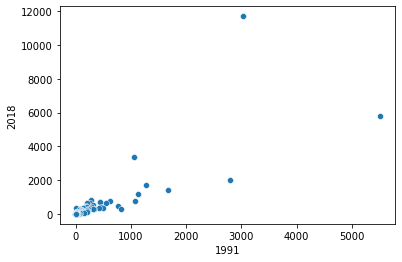

In [18]:
# agriculture plot
agricultureplot = sns.scatterplot(data = agriculture, x = '1991', y = '2018') 

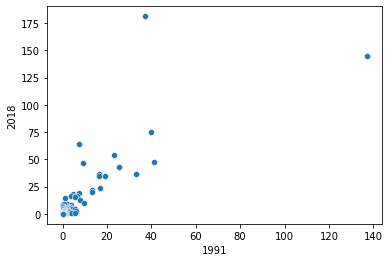

In [19]:
# bunker fuel (shipping) plot
shippingplot = sns.scatterplot(data = bunker_fuels, x = '1991', y = '2018')

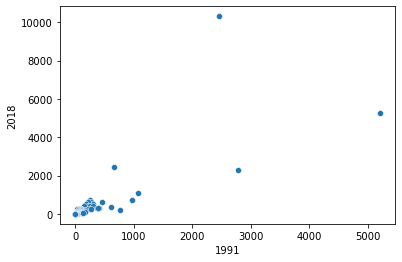

In [20]:
# energy plot
energyplot = sns.scatterplot(data = energy, x = '1991', y = '2018')

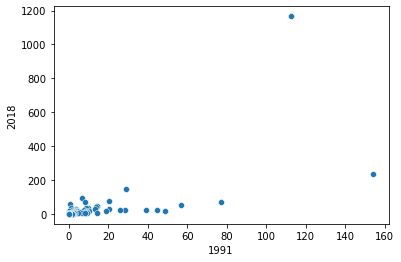

In [21]:
# industrial ghg emission plot
industrialplot = sns.scatterplot(data = industrial, x = '1991', y = '2018')

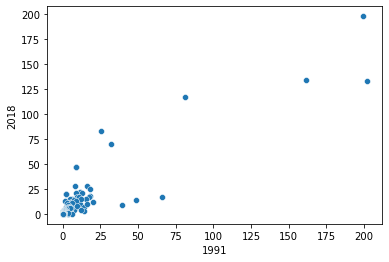

In [22]:
# waste plot
wasteplot = sns.scatterplot(data = waste, x = '1991', y = '2018')

While useful, there are some outliers in this plot that are concentrating some of the points; let's remove them. In almost all cases, it’s China (making sense as a result of their massive growth in recent decades), but in the case of bunker fuels, it’s actually Singapore (as a global trading hub). Let's do that now:

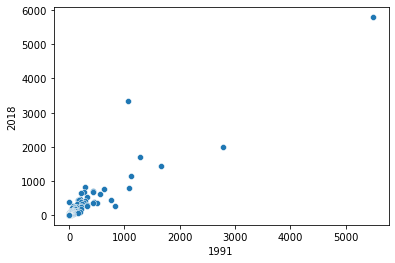

In [23]:
#agriculture plot, again
newagplot = sns.scatterplot(data = agriculture[agriculture['Country/Region'] != 'China'], 
                            x = '1991', y = '2018')

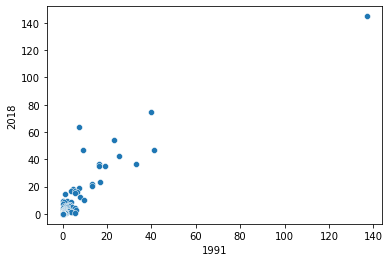

In [24]:
#shipping plot, again
newbfplot = sns.scatterplot(data = bunker_fuels[bunker_fuels['Country/Region'] != 'Singapore'], 
                            x = '1991', y = '2018')

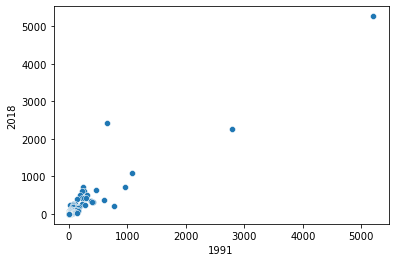

In [25]:
#energy plot, again
newegplot = sns.scatterplot(data = energy[energy['Country/Region'] != 'China'], 
                            x = '1991', y = '2018')

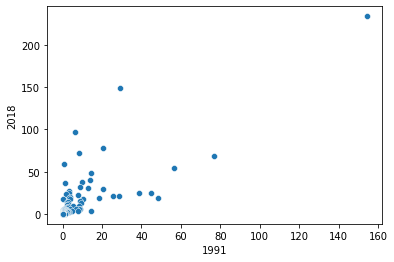

In [26]:
#new industrial plot, again
newidplot = sns.scatterplot(data = industrial[industrial['Country/Region'] != 'China'],
                            x = '1991', y = '2018')

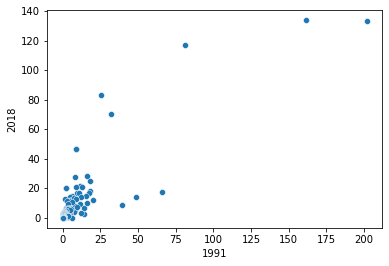

In [27]:
# new waste plot, again
newwsplot = sns.scatterplot(data = waste[waste['Country/Region'] != 'China'],
x = '1991', y = '2018')

This is interesting! While many of the relationships seem linear (good for exploring later), a good piece of info that proves we might be on the right track might come from looking at the industrial GHG emission scatterplot.

Many of the top-facing "outliers" in the plot (like India, South Korea, Thailand, Cameroon, and Vietnam) are actually top clothes-producing countries! This suggests that fashion is (in part) likely contributing to the rise in industrial emissions there, outpacing the global "trend line."